# UNHCR Refugee Statistics for Canada from 2012-2022¶

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#function to add data labels

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha="center")

### Load the dataset

In [3]:
# Load the dataset into dataframe
df = pd.read_csv("can-stats-2012-22.csv")

In [4]:
df

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70
...,...,...,...,...,...
1865,2022,Venezuela (Bolivarian Republic of),1497,2104,3601
1866,2022,Western Sahara,5,0,5
1867,2022,Yemen,450,452,902
1868,2022,Zambia,23,25,48


## Explore the dataset

In [5]:
df.shape
print(f"The shape of the dataframe is {df.shape}")

The shape of the dataframe is (1870, 5)


**The dataset contains 1870 columns and 5 rows.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [7]:
pd.DataFrame(df.isnull().sum(),columns=["Missing Values"])

,Missing Values
Year,0
Country-of-origin,0
UNHCR-refugees,0
Asylum-seekers,0
total-count,0


In [8]:
No_of_Countries = df["Country-of-origin"].nunique()
print (f"The number of countries in the dataset are {No_of_Countries}")

The number of countries in the dataset are 184


**REMARKS**

**1. All the data types are appropraite**
**2. There are no missing values in the dataset**


In [9]:
df.sample(5)

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
896,2017,Colombia,8049,1567,9616
629,2015,Nepal,1304,74,1378
1739,2022,Cyprus,0,6,6
254,2013,Japan,26,14,40
1670,2021,Stateless,400,98,498


In [10]:
df.columns
print("The dataset contains 5 columns")
print(df.columns)

The dataset contains 5 columns
Index(['Year', 'Country-of-origin', 'UNHCR-refugees', 'Asylum-seekers',
       'total-count'],
      dtype='object')


## Checking for duplicate values

In [11]:
df.duplicated().sum()

0

**There are no duplicate values in the dataset**

## EXPLORATORY DATA ANALYSIS

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1870.0,2016.955615,3.167123,2012.0,2014.00,2017.0,2020.00,2022.0
UNHCR-refugees,1870.0,752.438503,2427.738942,0.0,20.00,124.0,563.75,75098.0
Asylum-seekers,1870.0,323.139572,1181.143362,0.0,7.00,36.0,195.25,19765.0
total-count,1870.0,1075.578075,2980.751399,0.0,39.25,187.0,889.75,75294.0


### OBSERVATIONS
1. There is a total of 1870 records.
2. The dataset is between 2012 to 2022.
3. The average number of refugees between 2012 to 2022 is 752.438503
4. The maximum number of refugees accepted within a year is 75098 
5. The average number of asylum seekers between 2012 to 2022 is 323.139572
6. The maximum number of asylum seekers within a year is 19765


In [13]:
# TO CHECK THE CORRELATION COEFFICIENTS
df.corr(numeric_only = True)

,Year,UNHCR-refugees,Asylum-seekers,total-count
Year,1.000000,-0.024037,0.144239,0.037578
UNHCR-refugees,-0.024037,1.000000,0.278267,0.924737
Asylum-seekers,0.144239,0.278267,1.000000,0.622897
total-count,0.037578,0.924737,0.622897,1.000000


### OBSERVATIONS
1. There is a slightly positive correlation between Number of refugees and asylum seekers, which could mean, the more the number of number of asylum seekers, the more number of refugees.
2. There is a slightly positive correlation between year and asylum seekers, which could mean, the asylum seekers increase with the year.
 

## ANALYSIS QUESTIONS

## Question 1
From which countries has Canada admitted the highest number of refugees?

**From Colombia(108416), followed by China(98586), then Ukraine(88376), Pakistan(74737) and Haiti(70956).**

In [14]:
# REFUGEES BY COUNTRY
df_refugees = (df["UNHCR-refugees"].groupby(by = df["Country-of-origin"])
             .sum().sort_values(ascending = False)[0:5])
df_refugees.reset_index()

,Country-of-origin,UNHCR-refugees
0,Colombia,108416
1,China,98586
2,Ukraine,88376
3,Pakistan,74737
4,Haiti,70956


In [15]:
percent_df_refugees = df_refugees/df_refugees.sum()*100
percent_df_refugees.reset_index()

,Country-of-origin,UNHCR-refugees
0,Colombia,24.580170
1,China,22.351503
2,Ukraine,20.036683
3,Pakistan,16.944438
4,Haiti,16.087206


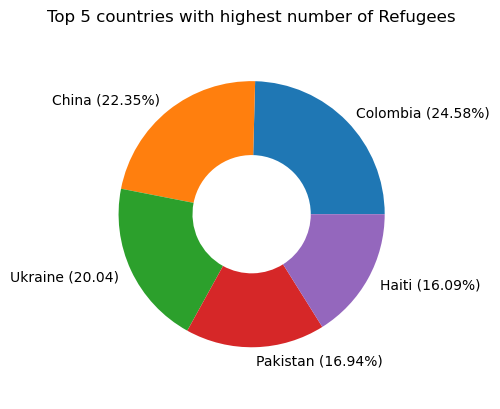

In [16]:
keys = ['Colombia (24.58%)','China (22.35%)','Ukraine (20.04)','Pakistan (16.94%)','Haiti (16.09%)']

plt.pie(df_refugees, labels = keys, radius = 0.9, wedgeprops = dict(width=0.5))
plt.title ('Top 5 countries with highest number of Refugees');

## Question 2 
What are the total number of resettled refugees in Canada per year?

In [17]:
# REFUGEES BY YEAR
df_refugees_year = (df["UNHCR-refugees"].groupby(by = df["Year"])
             .sum().sort_values(ascending = False)).reset_index()
df_refugees_year

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2022,140621
4,2015,135890
5,2021,130125
6,2018,114101
7,2020,109214
8,2017,104768
9,2019,101757


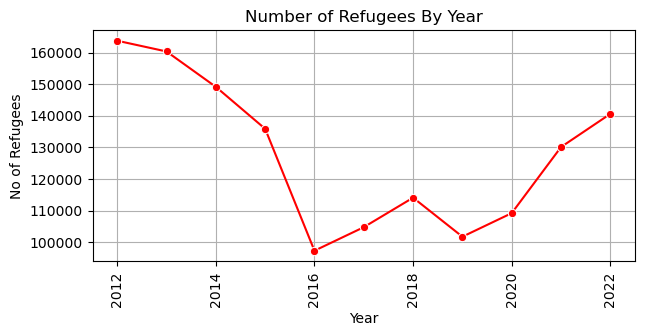

In [18]:
plt.figure(figsize = (7,3))
sns.lineplot (data = df_refugees_year, x = "Year", y = "UNHCR-refugees",marker = "o", color="red" )
plt.title("Number of Refugees By Year")
plt.ylabel("No of Refugees")
plt.grid(visible = True)
plt.xlabel("Year")
plt.xticks (rotation = 90);

## Question 3
 What are the countries of origin for the majority of asylum claims made in Canada?
 
 The highest asylum claim made is from an unknown country, strongly followed by Nigeria, India, Mexico and Haiti

In [19]:
# ASYLUM SEEKERS BY COUNTRY
df_asylum = (df["Asylum-seekers"].groupby(by = df["Country-of-origin"])
             .sum().sort_values(ascending = False)[0:10]).reset_index()
df_asylum

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,47146
4,Haiti,40908
5,Colombia,30475
6,China,21526
7,Pakistan,19023
8,Türkiye,18166
9,Iran (Islamic Rep. of),15011


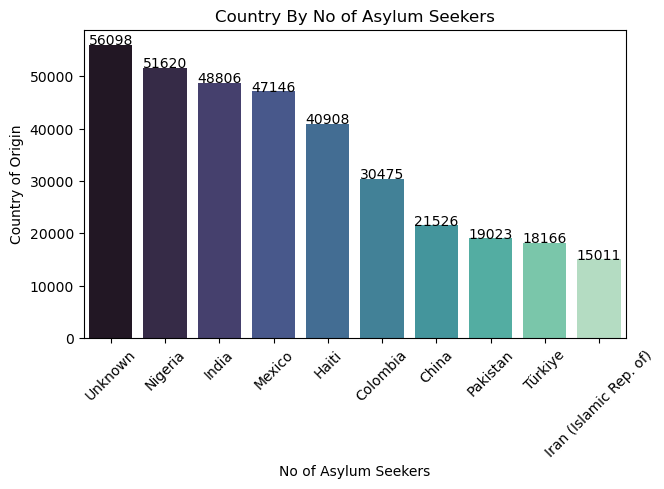

In [20]:
plt.figure(figsize = (7,4))
sns.barplot(data = df_asylum, x = "Country-of-origin", y = "Asylum-seekers", palette = "mako")
plt.ylabel("Country of Origin")
plt.xlabel("No of Asylum Seekers")

addlabels(df_asylum["Country-of-origin"].to_list(),df_asylum["Asylum-seekers"].to_list())
plt.title("Country By No of Asylum Seekers")
plt.xticks (rotation = 45);

## Question 4

**What is the total number of asylum claims made in Canada every year?**


In [21]:
# ASYLUM SEEKERS BY YEAR
df_asylum_year = (df["Asylum-seekers"].groupby(by = df["Year"])
             .sum().sort_values(ascending = False))
df_asylum_year

Year
2022    113066
2019     97017
2020     85352
2018     78766
2021     63143
2017     51859
2012     32647
2016     23946
2013     22145
2015     19631
2014     16699
Name: Asylum-seekers, dtype: int64

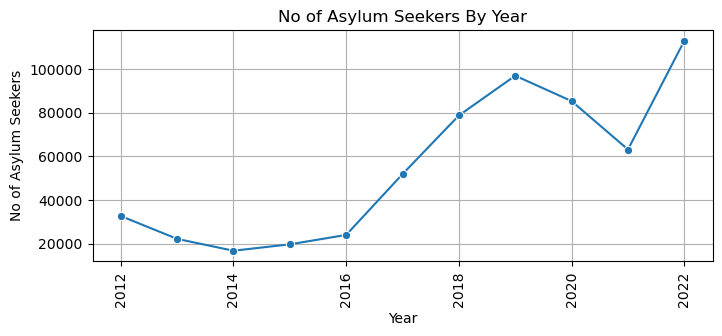

In [22]:
plt.figure(figsize = (8,3))
sns.lineplot (data = df_asylum_year.reset_index(), x = "Year", y = "Asylum-seekers", marker = "o",)
plt.title("No of Asylum Seekers By Year")
plt.ylabel("No of Asylum Seekers")
plt.xlabel("Year")
plt.grid(visible=True)
plt.xticks (rotation = 90);

## Question 5
What are the general trends in refugee and asylum statistics from 2012-2022?
1. There is a slightly positive correlation between Number of refugees and asylum seekers, which could mean, the more the number of number of asylum seekers, the more number of refugees.
2. There is a slightly positive correlation between year and asylum seekers, which could mean, the asylum seekers increase with year (Cell 22 above).


In [23]:
df["Asylum-seekers"].corr(df["UNHCR-refugees"])

0.27826653631264564

In [24]:
df["Year"].corr(df["Asylum-seekers"])

0.14423851840169538

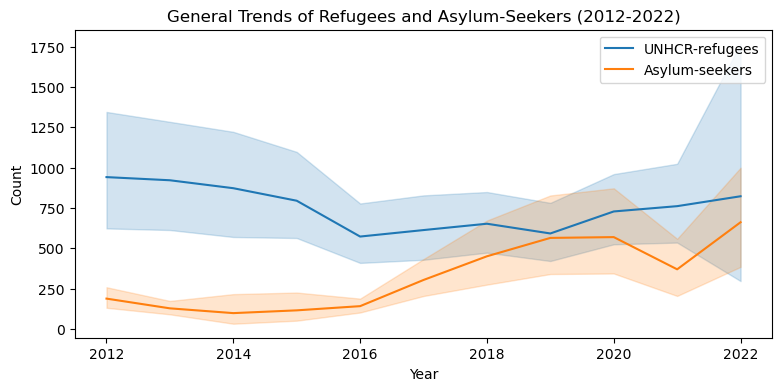

In [25]:
plt.figure(figsize = (9,4))
sns.lineplot(data = df, x="Year", y="UNHCR-refugees", label="UNHCR-refugees")
sns.lineplot(data = df, x="Year", y="Asylum-seekers", label="Asylum-seekers")

plt.title("General Trends of Refugees and Asylum-Seekers (2012-2022)")
plt.ylabel("Count")
plt.xlabel("Year")
plt.legend();

In [26]:
top_refugee_countries = df.groupby("Country-of-origin")["total-count"].sum().reset_index().sort_values("total-count", ascending=False)
top_refugee_countries

,Country-of-origin,total-count
35,Colombia,138891
33,China,120112
117,Nigeria,112174
72,Haiti,111864
106,Mexico,98218
...,...,...
88,Kiribati,15
27,Cabo Verde,10
98,Luxembourg,5
18,Bermuda,5


In [27]:
resettled_and_asylum_year=df.groupby("Year")[["UNHCR-refugees", "Asylum-seekers"]].sum().reset_index().sort_values("Year")
resettled_and_asylum_year

,Year,UNHCR-refugees,Asylum-seekers
0,2012,163751,32647
1,2013,160347,22145
2,2014,149164,16699
3,2015,135890,19631
4,2016,97322,23946
5,2017,104768,51859
6,2018,114101,78766
7,2019,101757,97017
8,2020,109214,85352
9,2021,130125,63143


In [28]:
melted_data = pd.melt(resettled_and_asylum_year, id_vars = ["Year"], var_name = "Category", value_name = "Count")
melted_data

,Year,Category,Count
0,2012,UNHCR-refugees,163751
1,2013,UNHCR-refugees,160347
2,2014,UNHCR-refugees,149164
3,2015,UNHCR-refugees,135890
4,2016,UNHCR-refugees,97322
5,2017,UNHCR-refugees,104768
6,2018,UNHCR-refugees,114101
7,2019,UNHCR-refugees,101757
8,2020,UNHCR-refugees,109214
9,2021,UNHCR-refugees,130125


Text(0.5, 1.0, 'Total Refugees and Asylum Seekers Per Year')

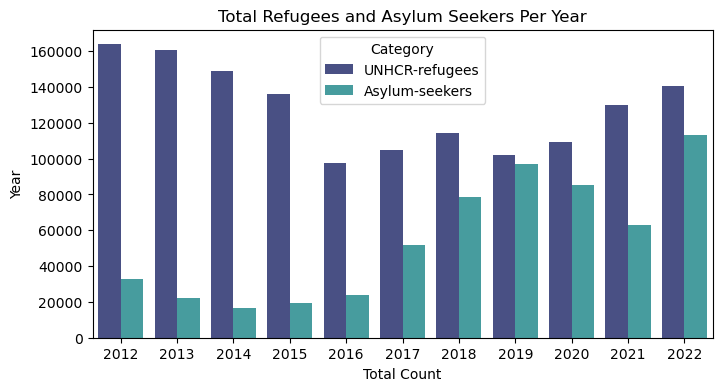

In [29]:
plt.figure(figsize = (8,4))
sns.barplot(data = melted_data, x = "Year", y = "Count", hue= "Category", palette = "mako")
plt.ylabel("Year")
plt.xlabel("Total Count")

plt.title("Total Refugees and Asylum Seekers Per Year")
#plt.xticks (rotation = 90);

# INSIGHTS 
1. There are asylum seekers and refugees from a total of 184 different countries of origin.
2. On an average, there are approximately 1075 asylum seekers and refugees in Canada each year. 
3. The total of asylum claims and refugees yearly:

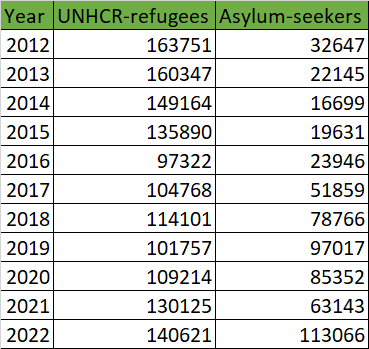

**It shows a consistent flow of individuals seeking refuge or asylum, highlighting the enduring importance of addressing issues related to displacement and forced migration on a global scale.**

4. In 2022, Canada witnessed its highest number of asylum seekers, reaching approximately 113,600 individuals.
**This reflects broader patterns of movement and displacement worldwide, driven by factors such as political instability, climate change, and economic conditions. It aligns with broader trends of people seeking safety and better opportunities in different countries, highlighting the interconnectedness of migration on a global scale.**
5.  Countries with the highest number of refugees in Canada are 
 -- Colombia	(108,416)
 -- China	(98,586)
 -- Ukraine	(88,376)
 -- Pakistan (74,737)
 -- Haiti (70,956)
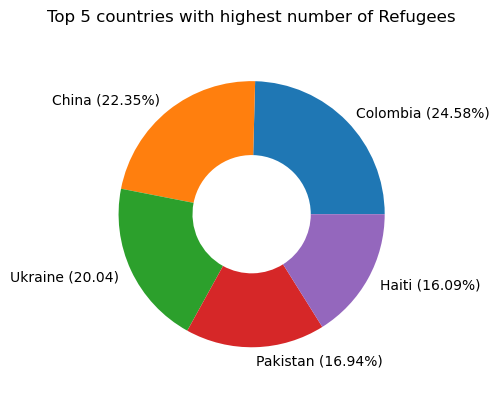

6. Countries with the highest number of asylum seekers are -- Unknown	(56,098)	--Nigeria	(51,620) --India	(48806) -- Mexico	(47,146) -- Haiti	(40,908) -- Colombia	(30,475) -- China	(21,526) -- Pakistan	(19,023) -- Türkiye	(18,166) -- Iran (Islamic Rep. of)	(15011)
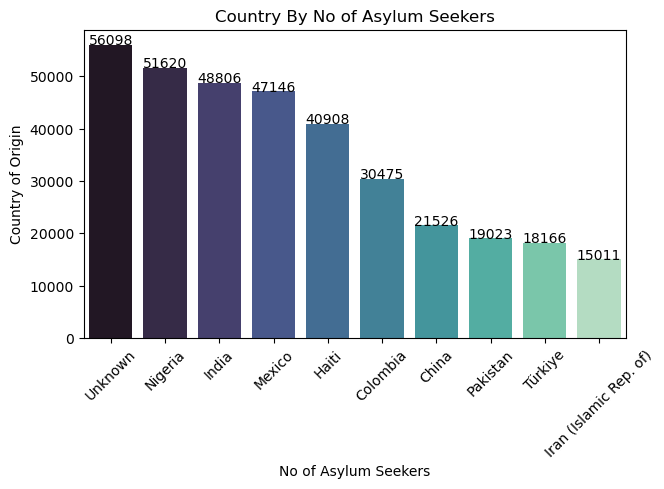

**Canada's asylum seekers come from a wide range of countries, indicating the global nature of forced migration. The diversity in nationalities highlights that people seeking asylum in Canada come from various regions and backgrounds.**

**The presence of over 56,000 individuals categorized as "Unknown" suggests challenges in accurately documenting the origin of all asylum seekers. It underscores the complexities of tracking and processing asylum claims, which can be influenced by factors such as statelessness or documentation issues.**

**Notably, several countries from different regions, including Nigeria, India, Mexico, and Haiti, have a substantial number of asylum seekers in Canada. This suggests that factors driving forced migration are not limited to specific regions and can vary widely.**

In summary, the data tells a story of Canada as a destination for asylum seekers and refugees from a vast array of countries. It sheds light on both the consistency of immigration trends and the unique challenges faced in documenting and processing asylum claims. This understanding is crucial for shaping immigration policies, resource allocation, and support systems to address the diverse needs of those seeking refuge in Canada.





